In [1]:
import torch
import random
from torch import nn, optim
import math
from IPython import display

from res.plot_lib import plot_data, plot_model, set_default

set_default()

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Create the synthetic data

In [3]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [4]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


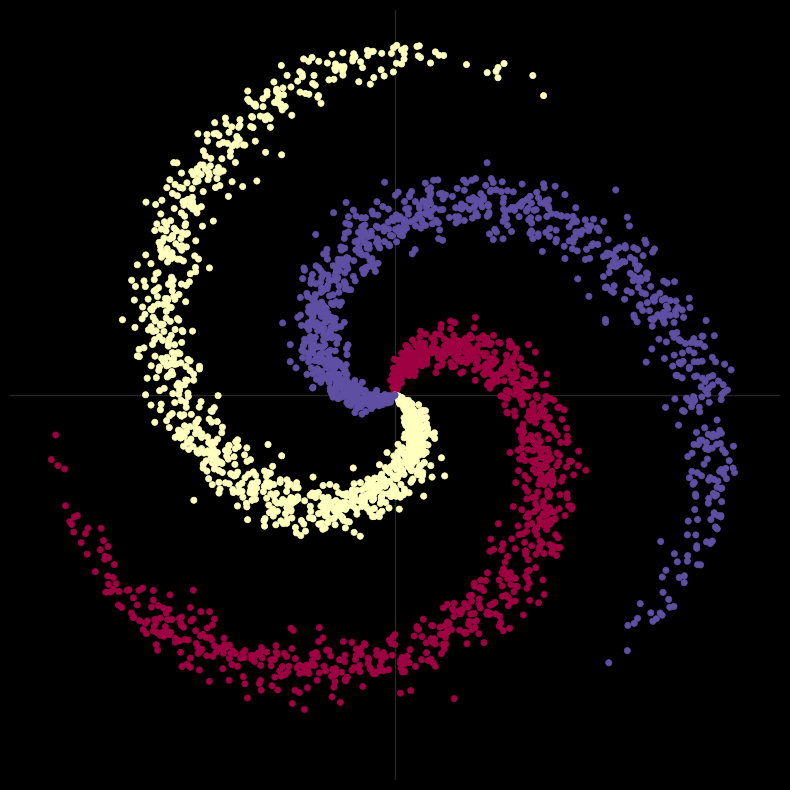

In [5]:
# Visualize the data
plot_data(X, y)

### Linear Model

In [6]:
# Learning parameters
learning_rate = 1e-3
lambda_l2 = 1e-5

In [7]:
#1. Model: linear model with 1 hidden layer
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device)

# 2. Loss function: cross-entropy loss
criterion = nn.CrossEntropyLoss()

# 3. Optimizer
optimizer = torch.optim.Adam(
    model.parameters(), 
    lr=learning_rate,
    weight_decay=lambda_l2
)



In [8]:
# Training
for t in range(1000):
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print('[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f' % (t, loss, acc))
    display.clear_output(wait=True)
    
    # Zero the gradients before warning the backward pass
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.775229, [ACCURACY]: 0.507


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


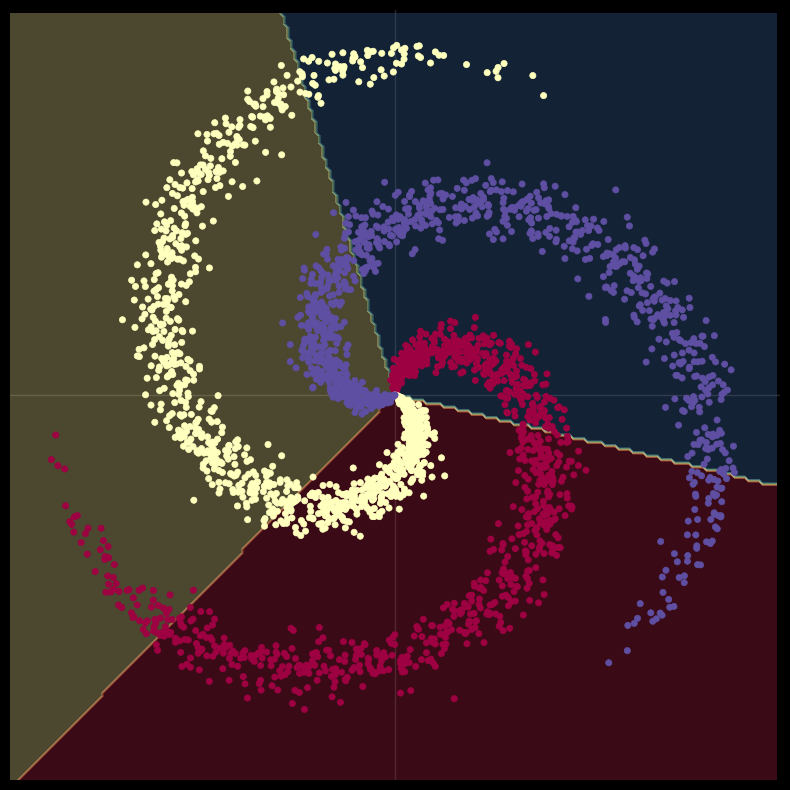

In [9]:
# Plot trained model
print(model)
plot_model(X, y, model)

### Non-Linear Model: 1-hidden layer NN

In [10]:
# 1. Model: 1-hidden layer NN
model_nn = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

model_nn.to(device)

#2. Loss function
criterion = nn.CrossEntropyLoss()

# 3. Optimizer
optimizer = torch.optim.Adam(
    model_nn.parameters(), 
    lr=learning_rate,
    weight_decay=lambda_l2
)

In [11]:
# Batch gradient descent training
for t in range(1000):
    # Feed forward to get the logits
    y_pred = model_nn(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print('[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f' % (t, loss, acc))
    display.clear_output(wait=True)
    
    # Zero the gradients before warning the backward pass
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.008490, [ACCURACY]: 0.999


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=3, bias=True)
)


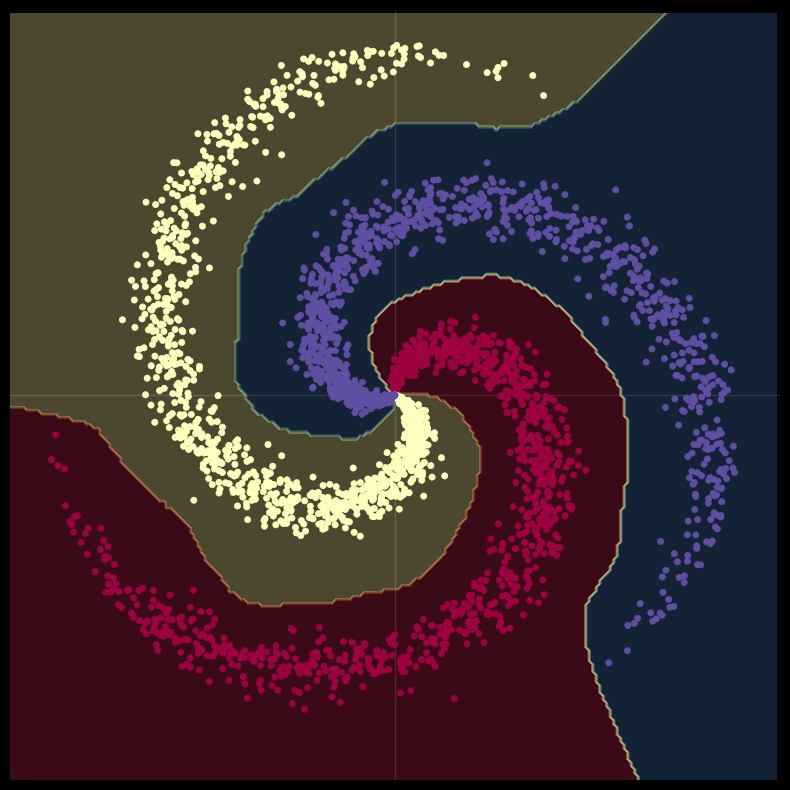

In [12]:
# Plot trained model
print(model_nn)
plot_model(X, y, model_nn)